In [1]:
import sys 
sys.path.insert(-1,"../")
from mazeAgentUtils import *

%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
N=50
xcen = np.linspace(0,5,N+1)[:-1]
xcen += (xcen[1] - xcen[0]) / 2
ycen = np.array([0.1]*N)
centres = np.vstack((xcen,ycen)).T

#Default parameters for MazeAgent 
params = { 

          #Maze params 
          'mazeType'            : 'loop',  #type of maze, define in getMaze() function
          'stateType'           : 'bump', #feature on which to TD learn (onehot, gaussian, gaussianCS, circles, bump)
          'movementPolicy'      : 'windowsScreensaver',  #movement policy (raudies, random walk, windows screensaver)
          'roomSize'            : 5,          #maze size scaling parameter, metres
          'dt'                  : 0.0025,       #simulation time disretisation 
          'centres'             : centres,       #array of receptive field positions. Overwrites nCells
          'sigma'               : 1,          #basis cell width scale (irrelevant for onehots)
          'doorsClosed'         : False,       #whether doors are opened or closed in multicompartment maze

          #TD params 
          'tau'                 : 3,          #TD decay time, seconds
          'TDdx'                : 0.01,       #rough distance between TD learning updates, metres 
          'alpha'               : 0.01,       #TD learning rate 
          'successorFeatureNorm': 100,        #linear scaling on successor feature definition found to improve learning stability

          #STDP params
          'a_pre'               : 1,          #bump in cell 'presynaptic trace' when it spikes
          'a_post'              : 0.7,      #bump in cell 'postsynaptic trace' when it spikes
          'precessFraction'     : 1,        #fraction of 2pi the prefered phase moves through
          'peakFiringRate'      : 20,         #peak firing rate of a cell (middle of place field, preferred theta phase)
          'eta_pre'             : 0.05,        #learning rate for pre to post strengthening 
          'eta_post'            : 0.05,        #learning rate for post to pre weakening
          'kappa'               : 1,        #von mises spread parameter (smaller = wider)
          'tau_pre'             : 20e-3,      #rate potentiating trace decays
          'tau_post'            : 20e-3,      #rate depressing trace decays 

}


agent =  MazeAgent(params)



Setting parameters
Initialising
   making state/history dataframes
   initialising velocity, position and direction
   setting time/run counters
   making the maze walls
   discretising position for later plotting
   handling undefined parameters
   initialising basis features for learning
   calculating state vector at all discretised positions


  0%|          | 0/10000 [00:00<?, ?it/s]

   initialising STDP weight matrix and traces


'../figures/210824/openloop_0758'

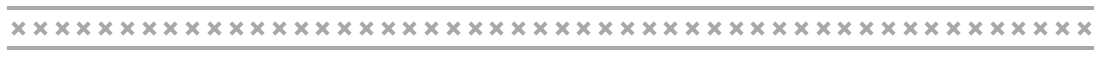

In [3]:
#FIGURE 2A
plotter = Visualiser(agent)
fig, ax = plotter.plotFeatureCells(centresOnly=True, textlabel=False,onepink=True)
saveFigure(fig,'openloop',specialLocation="../figures/paperFigures/figure2/2A.svg")


  0%|          | 0/720000 [00:00<?, ?it/s]

../mazeAgentUtils.py:819: RuntimeWarning: overflow encountered in exp
  state[distance<self.sigmas] += np.e * np.exp(-1/(1-(distance/self.sigmas)**2))[distance<self.sigmas]


Calculating place and grid cells


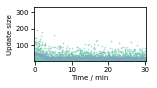

In [4]:
agent.runRat(trainTime=30,saveEvery=0.1)
plotter = Visualiser(agent)

'../figures/210824/Mav_1220_1'

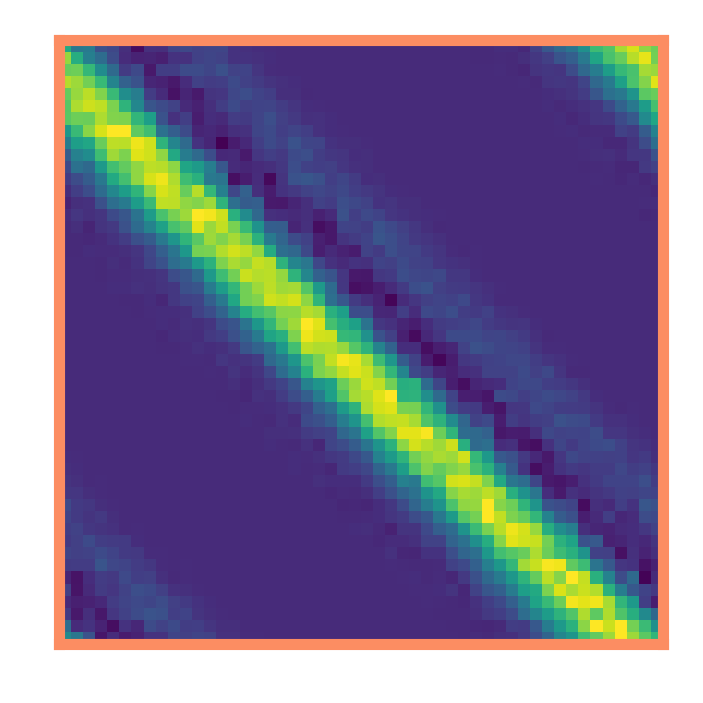

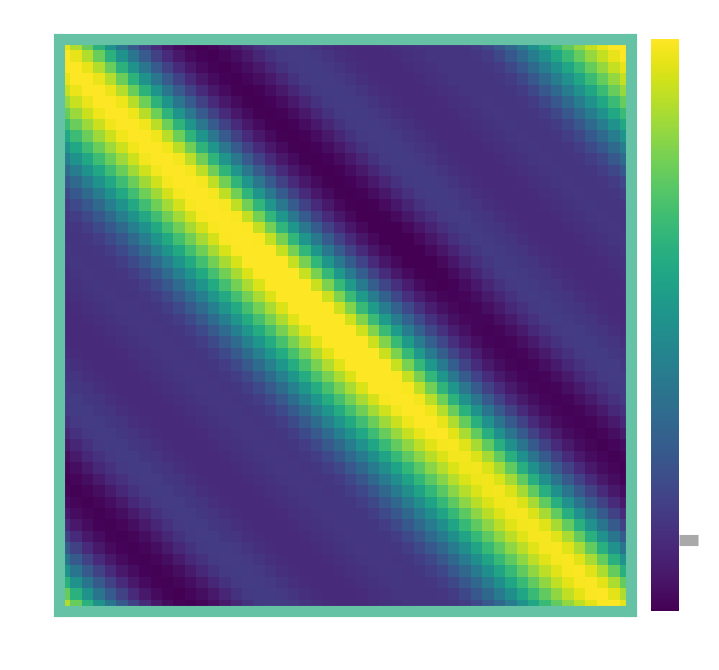

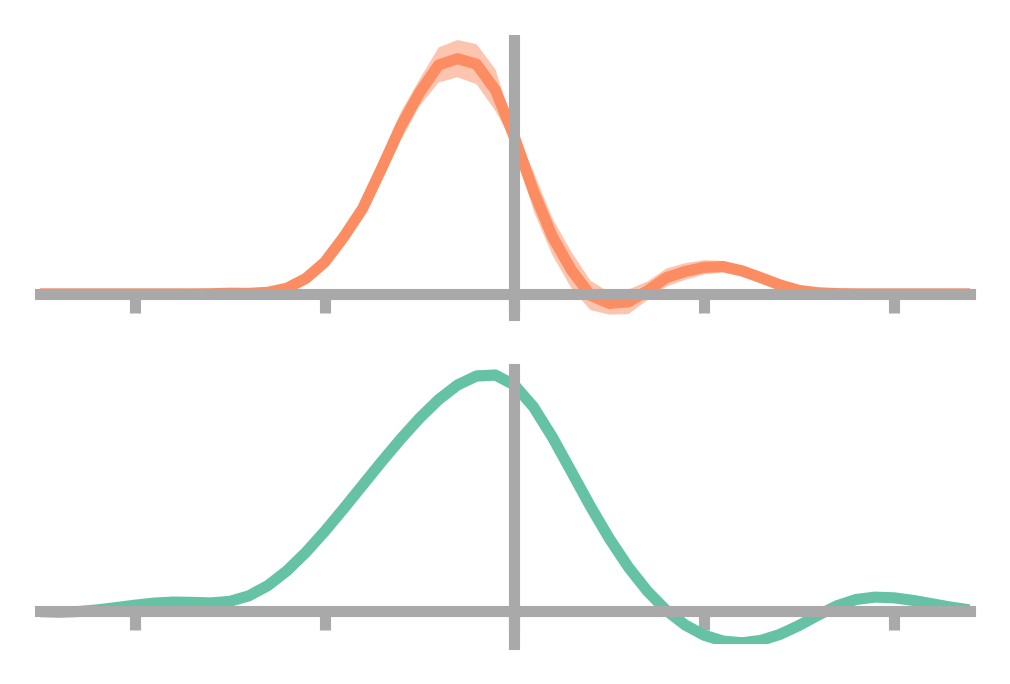

In [45]:
#FIGURE 2B
fig, ax = plotter.plotM(STDP=True,colorbar=False)
ax.axis('on')
for spine in ax.spines.values():
    spine.set_color('C1')
    spine.set_linewidth(2)
ax.set_xticks([])
ax.set_yticks([])
saveFigure(fig,'W',specialLocation='../figures/paperFigures/figure2/2B.svg')

#FIGURE 2C
fig, ax, cb, cax = plotter.plotM()
ax.axis('on')
for spine in ax.spines.values():
    spine.set_color('C0')
    spine.set_linewidth(2)
cb.set_ticks([0])
cb.set_ticklabels([""])
cax.tick_params(color='darkgrey',width=2)
ax.set_xticks([])
ax.set_yticks([])
saveFigure(fig,'M',specialLocation='../figures/paperFigures/figure2/2C.svg')


#FIGURE 2DE
fig, ax = plotter.plotMAveraged()
saveFigure(fig,'Mav',specialLocation='../figures/paperFigures/figure2/2DE.svg')


In [6]:
N=50
xcen = np.linspace(0,5,N+1)[:-1]
xcen += (xcen[1] - xcen[0]) / 2
ycen = np.array([0.1]*N)
centres = np.vstack((xcen,ycen)).T

# centres = np.array([[2.5,0.1],[2.6,0.1]])

#Default parameters for MazeAgent 
params2 = { 

          #Maze params 
          'mazeType'            : 'loop',  #type of maze, define in getMaze() function
          'stateType'           : 'bump', #feature on which to TD learn (onehot, gaussian, gaussianCS, circles, bump)
          'movementPolicy'      : 'windowsScreensaver',  #movement policy (raudies, random walk, windows screensaver)
          'roomSize'            : 5,          #maze size scaling parameter, metres
          'dt'                  : 0.0025,       #simulation time disretisation 
          'centres'             : centres,       #array of receptive field positions. Overwrites nCells
          'sigma'               : 1,          #basis cell width scale (irrelevant for onehots)
          'doorsClosed'         : True,       #whether doors are opened or closed in multicompartment maze

          #TD params 
          'tau'                 : 3,          #TD decay time, seconds
          'TDdx'                : 0.01,       #rough distance between TD learning updates, metres 
          'alpha'               : 0.01,       #TD learning rate 
          'successorFeatureNorm': 100,        #linear scaling on successor feature definition found to improve learning stability

          #STDP params
          'a_pre'               : 1,          #bump in cell 'presynaptic trace' when it spikes
          'a_post'              : 0.7,        #bump in cell 'postsynaptic trace' when it spikes
          'precessFraction'     : 1,        #fraction of 2pi the prefered phase moves through
          'peakFiringRate'      : 20,         #peak firing rate of a cell (middle of place field, preferred theta phase)
          'eta_pre'             : 0.05,        #learning rate for pre to post strengthening 
          'eta_post'            : 0.05,        #learning rate for post to pre weakening
          'kappa'               : 1,        #von mises spread parameter (smaller = wider)
          'tau_pre'             : 20e-3,      #rate potentiating trace decays
          'tau_post'            : 20e-3,      #rate depressing trace decays 

}


agent2 =  MazeAgent(params2)

Setting parameters
Initialising
   making state/history dataframes
   initialising velocity, position and direction
   setting time/run counters
   making the maze walls
   discretising position for later plotting
   handling undefined parameters
   initialising basis features for learning
   calculating state vector at all discretised positions


  0%|          | 0/10000 [00:00<?, ?it/s]

   initialising STDP weight matrix and traces


'../figures/210824/openloop_0807'

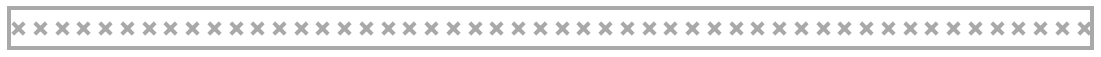

In [7]:
#FIGURE 2F
plotter2 = Visualiser(agent2)
fig, ax = plotter2.plotFeatureCells(centresOnly=True, textlabel=False,onepink=False)
saveFigure(fig,'openloop',specialLocation="../figures/paperFigures/figure2/2F.svg")


  0%|          | 0/720000 [00:00<?, ?it/s]

../mazeAgentUtils.py:819: RuntimeWarning: overflow encountered in exp
  state[distance<self.sigmas] += np.e * np.exp(-1/(1-(distance/self.sigmas)**2))[distance<self.sigmas]


Calculating place and grid cells


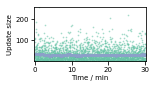

In [8]:
agent2.runRat(trainTime=30,saveEvery=0.1)
plotter2 = Visualiser(agent2)

'../figures/210824/Mav_1233'

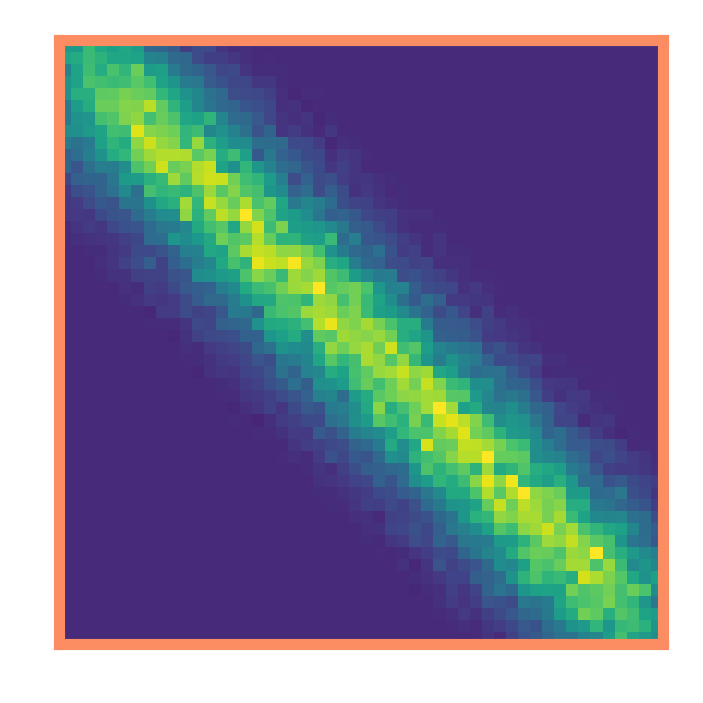

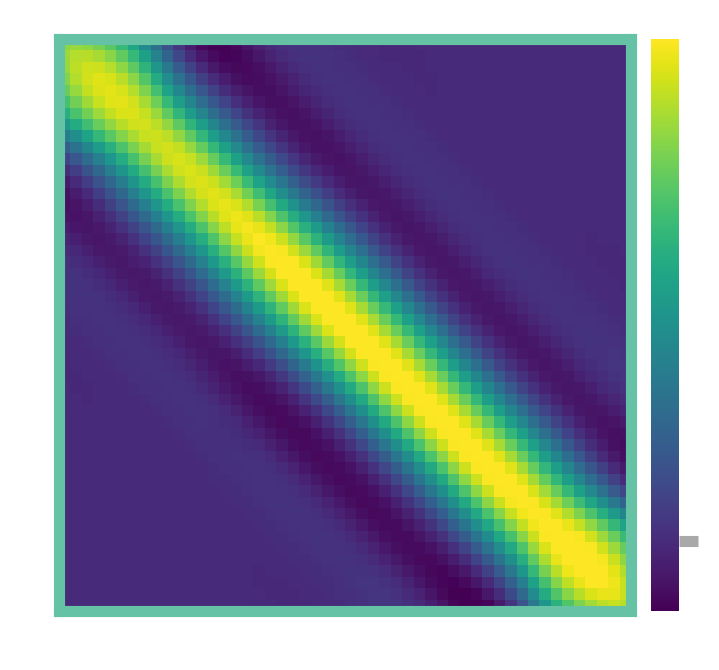

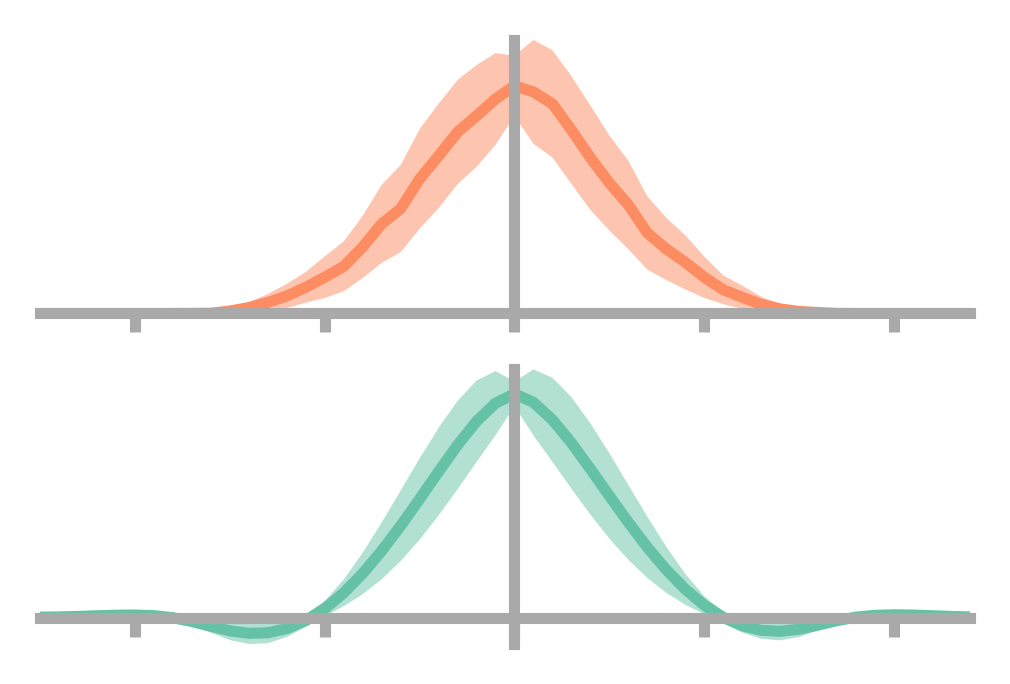

In [46]:
#FIGURE 2G
fig, ax = plotter2.plotM(STDP=True,colorbar=False)
ax.axis('on')
for spine in ax.spines.values():
    spine.set_color('C1')
    spine.set_linewidth(2)
ax.set_xticks([])
ax.set_yticks([])
saveFigure(fig,'W',specialLocation='../figures/paperFigures/figure2/2G.svg')

#FIGURE 2H
fig, ax, cb, cax = plotter2.plotM()
ax.axis('on')
for spine in ax.spines.values():
    spine.set_color('C0')
    spine.set_linewidth(2)
cb.set_ticks([0])
cb.set_ticklabels([""])
cax.tick_params(color='darkgrey',width=2)
ax.set_xticks([])
ax.set_yticks([])
saveFigure(fig,'M',specialLocation='../figures/paperFigures/figure2/2H.svg')


#FIGURE 2IJ
fig, ax = plotter2.plotMAveraged()
saveFigure(fig,'Mav',specialLocation='../figures/paperFigures/figure2/2IJ.svg')

In [29]:
#Default parameters for MazeAgent 
N = 288 
roomSize = 2.5
n = int(np.sqrt(N / 2))
delta = roomSize / n
x = np.arange(0,2.5,delta) + delta/2
y = np.arange(0,2.5,delta) + delta/2
xy = np.meshgrid(x,y)
centresL = []
for i in range(len(x)):
    for j in range(len(y)):
        centresL += [[x[i],y[j]]]
centresL = np.array(centresL)
centresR = centresL + np.array([2.5,0])
centres = np.vstack([centresL,centresR])
delta=0.45*delta
centres += np.random.uniform(-0.8*delta,0.8*delta,size=centres.shape)

params3 = { 

          #Maze params 
          'mazeType'            : 'twoRooms',  #type of maze, define in getMaze() function
          'stateType'           : 'bump', #feature on which to TD learn (onehot, gaussian, gaussianCS, circles, bump)
          'movementPolicy'      : 'raudies',  #movement policy (raudies, random walk, windows screensaver)
          'roomSize'            : roomSize,          #maze size scaling parameter, metres
          'dt'                  : 0.0025,       #simulation time disretisation 
          'dx'                  : 0.025,
          'centres'             : centres,
          'sigma'               : 1,          #basis cell width scale (irrelevant for onehots)
          'doorsClosed'         : False,       #whether doors are opened or closed in multicompartment maze
          'rotSpeedScale'       : 12,
          'firingRateLookUp'    : True,
          'biasDoorCross'       : True, 

          #TD params 
          'tau'                 : 3,          #TD decay time, seconds
          'TDdx'                : 0.01,       #rough distance between TD learning updates, metres 
          'alpha'               : 0.01,       #TD learning rate 
          'successorFeatureNorm': 100,        #linear scaling on successor feature definition found to improve learning stability

          #STDP params
          'a_pre'               : 1,          #bump in cell 'presynaptic trace' when it spikes
          'a_post'              : 0.7,        #bump in cell 'postsynaptic trace' when it spikes
          'precessFraction'     : 1,        #fraction of 2pi the prefered phase moves through
          'peakFiringRate'      : 20,         #peak firing rate of a cell (middle of place field, preferred theta phase)
          'eta_pre'             : 0.05,        #learning rate for pre to post strengthening 
          'eta_post'            : 0.05,        #learning rate for post to pre weakening
          'kappa'               : 1,        #von mises spread parameter (smaller = wider)
          'tau_pre'             : 20e-3,      #rate potentiating trace decays
          'tau_post'            : 20e-3,      #rate depressing trace decays 
          'weightDecayTime'     : 10000,         #STDP weight decay time in seconds 
}

agent3 =  MazeAgent(params3)

Setting parameters
Initialising
   making state/history dataframes
   initialising velocity, position and direction
   setting time/run counters
   making the maze walls
   discretising position for later plotting
   handling undefined parameters
   initialising basis features for learning
   calculating state vector at all discretised positions


  0%|          | 0/5000 [00:00<?, ?it/s]

   initialising STDP weight matrix and traces


'../figures/210824/twoRoom_1619'

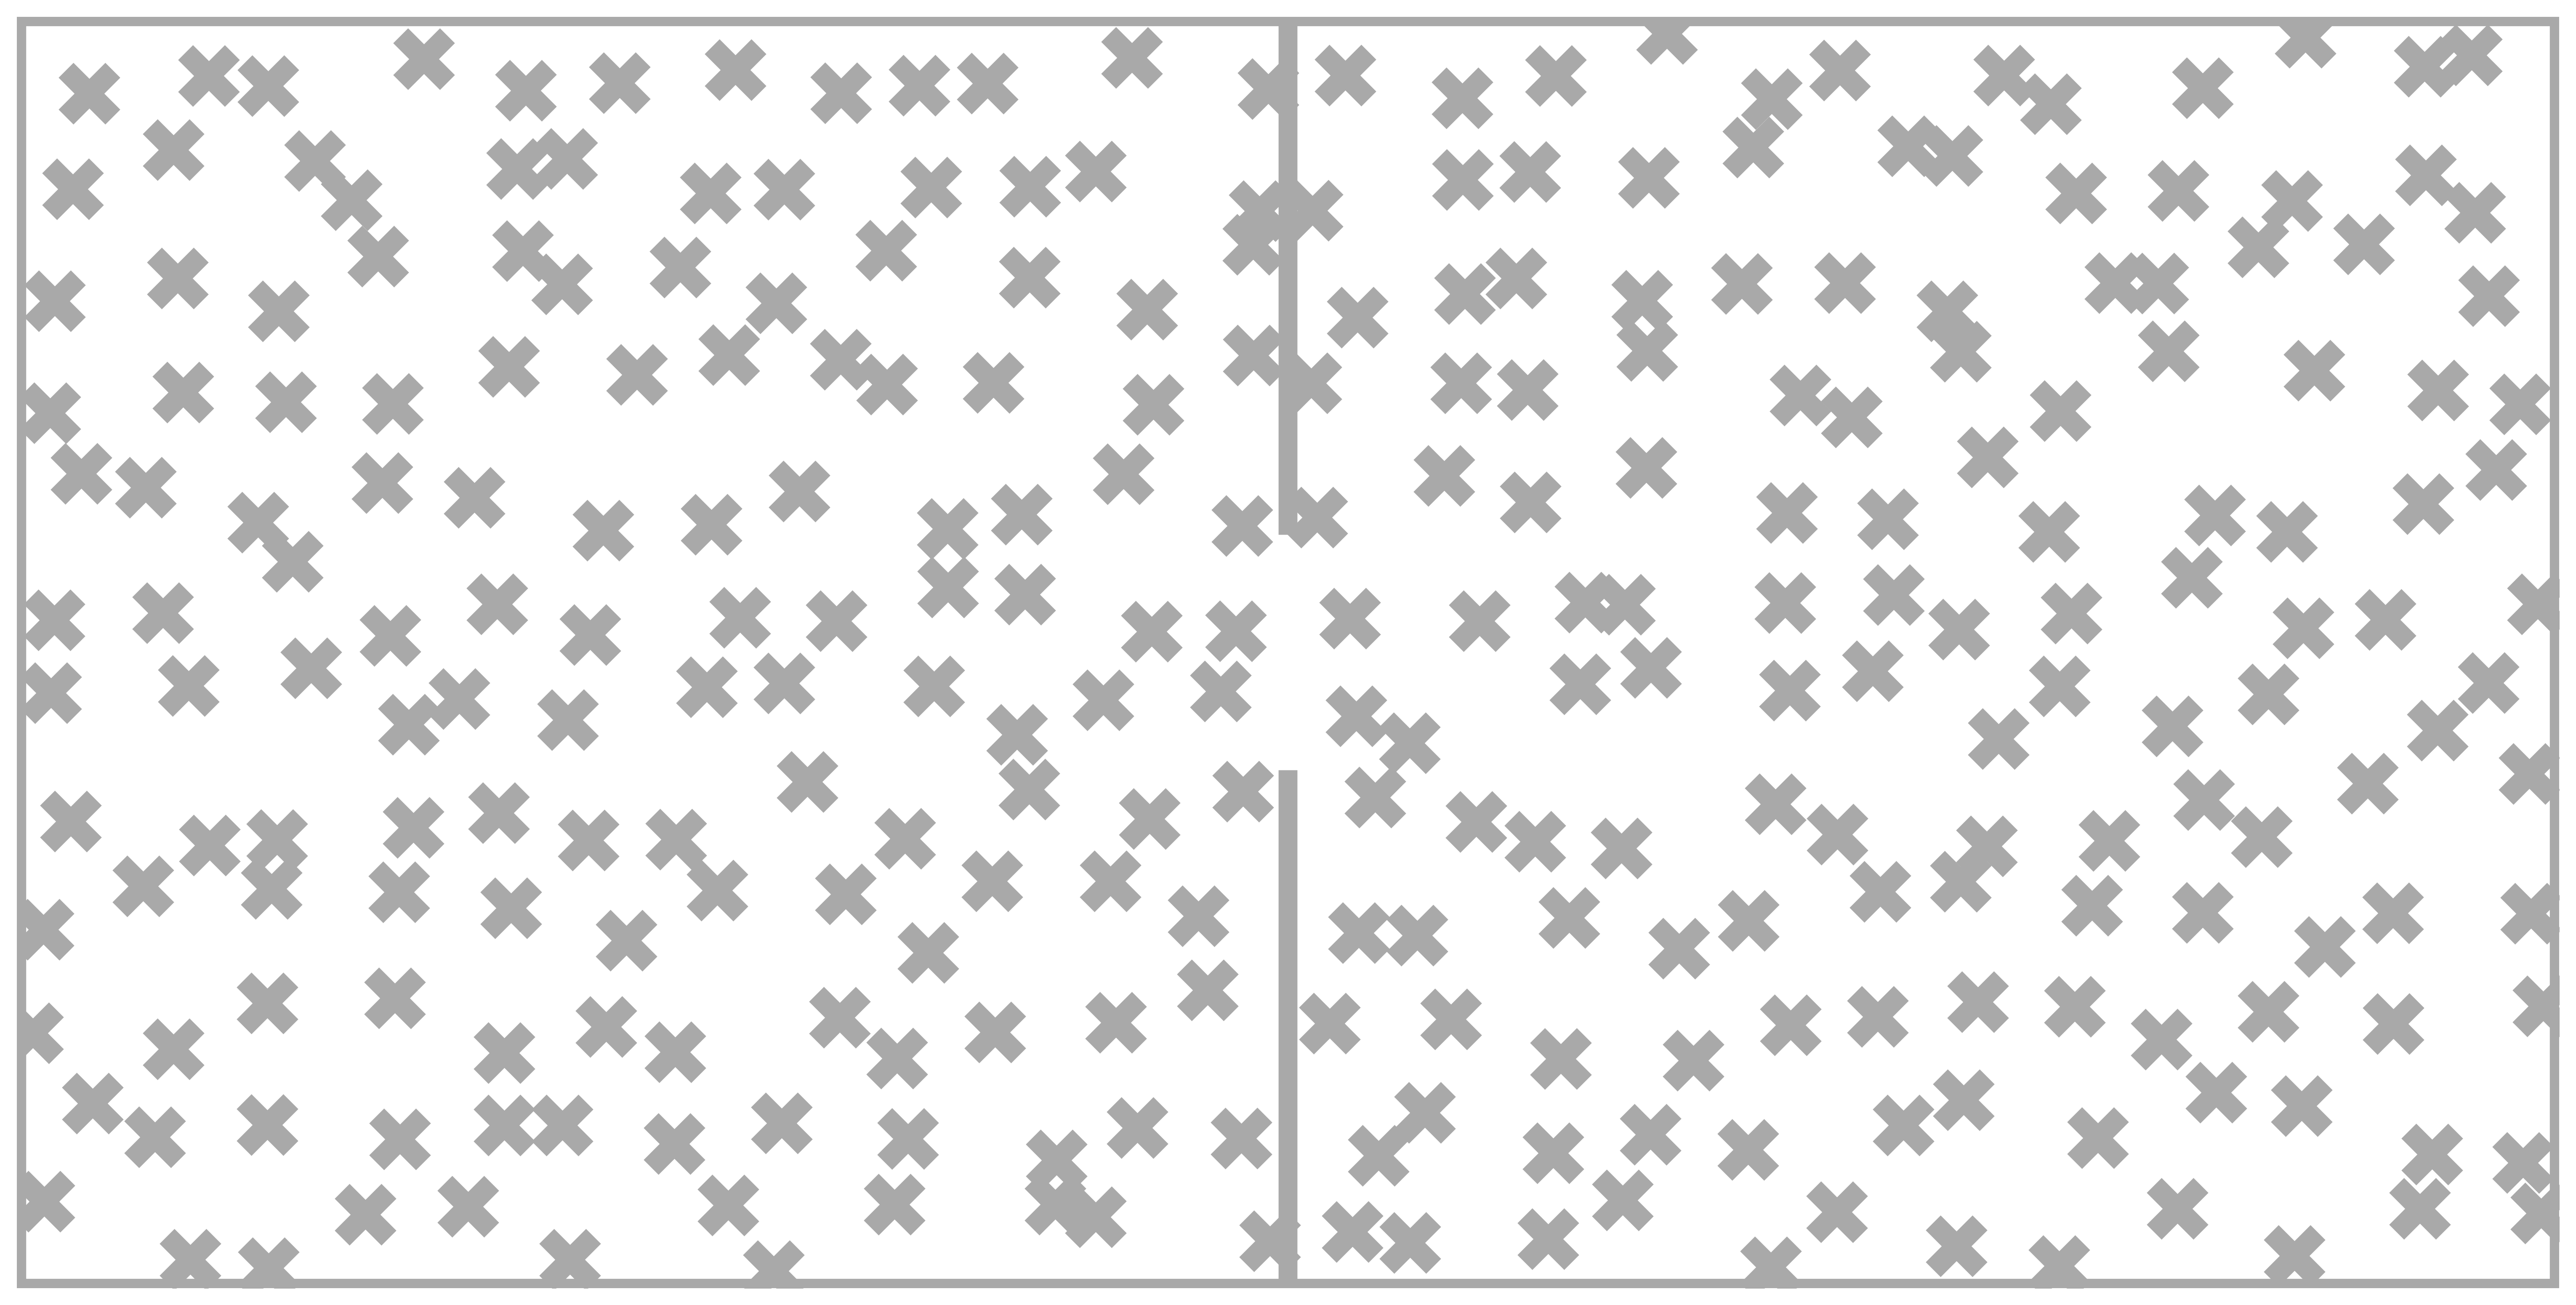

In [30]:
#FIGURE 2K
plotter3 = Visualiser(agent3)
fig, ax = plotter3.plotFeatureCells(centresOnly=True, textlabel=False)
saveFigure(fig, 'twoRoom',specialLocation="../figures/paperFigures/figure2/2K.svg")

# plotter3.plotReceptiveField(number=64)
# plotter3.plotReceptiveField(number=60)
# plotter3.plotReceptiveField(number=54)
# plotter3.plotReceptiveField(number=20)

  0%|          | 0/120000 [00:00<?, ?it/s]

Calculating place and grid cells


(<Figure size 8000x4000 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fee07ff4e80>)

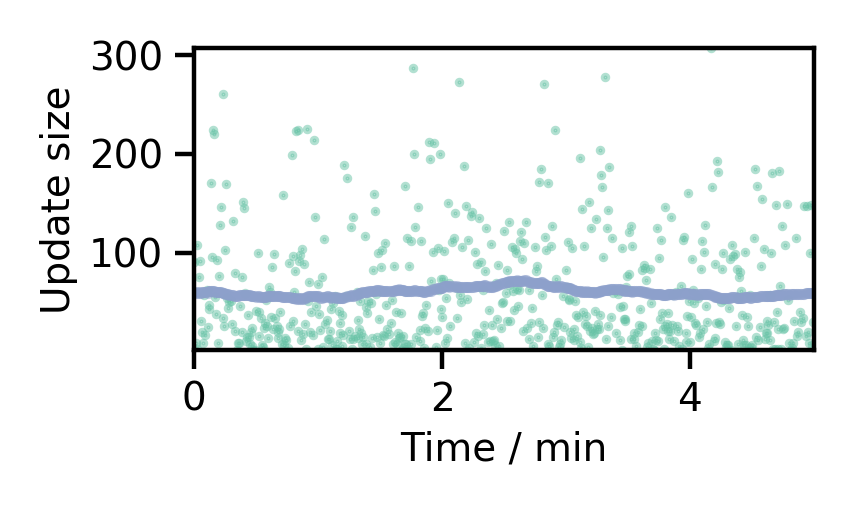

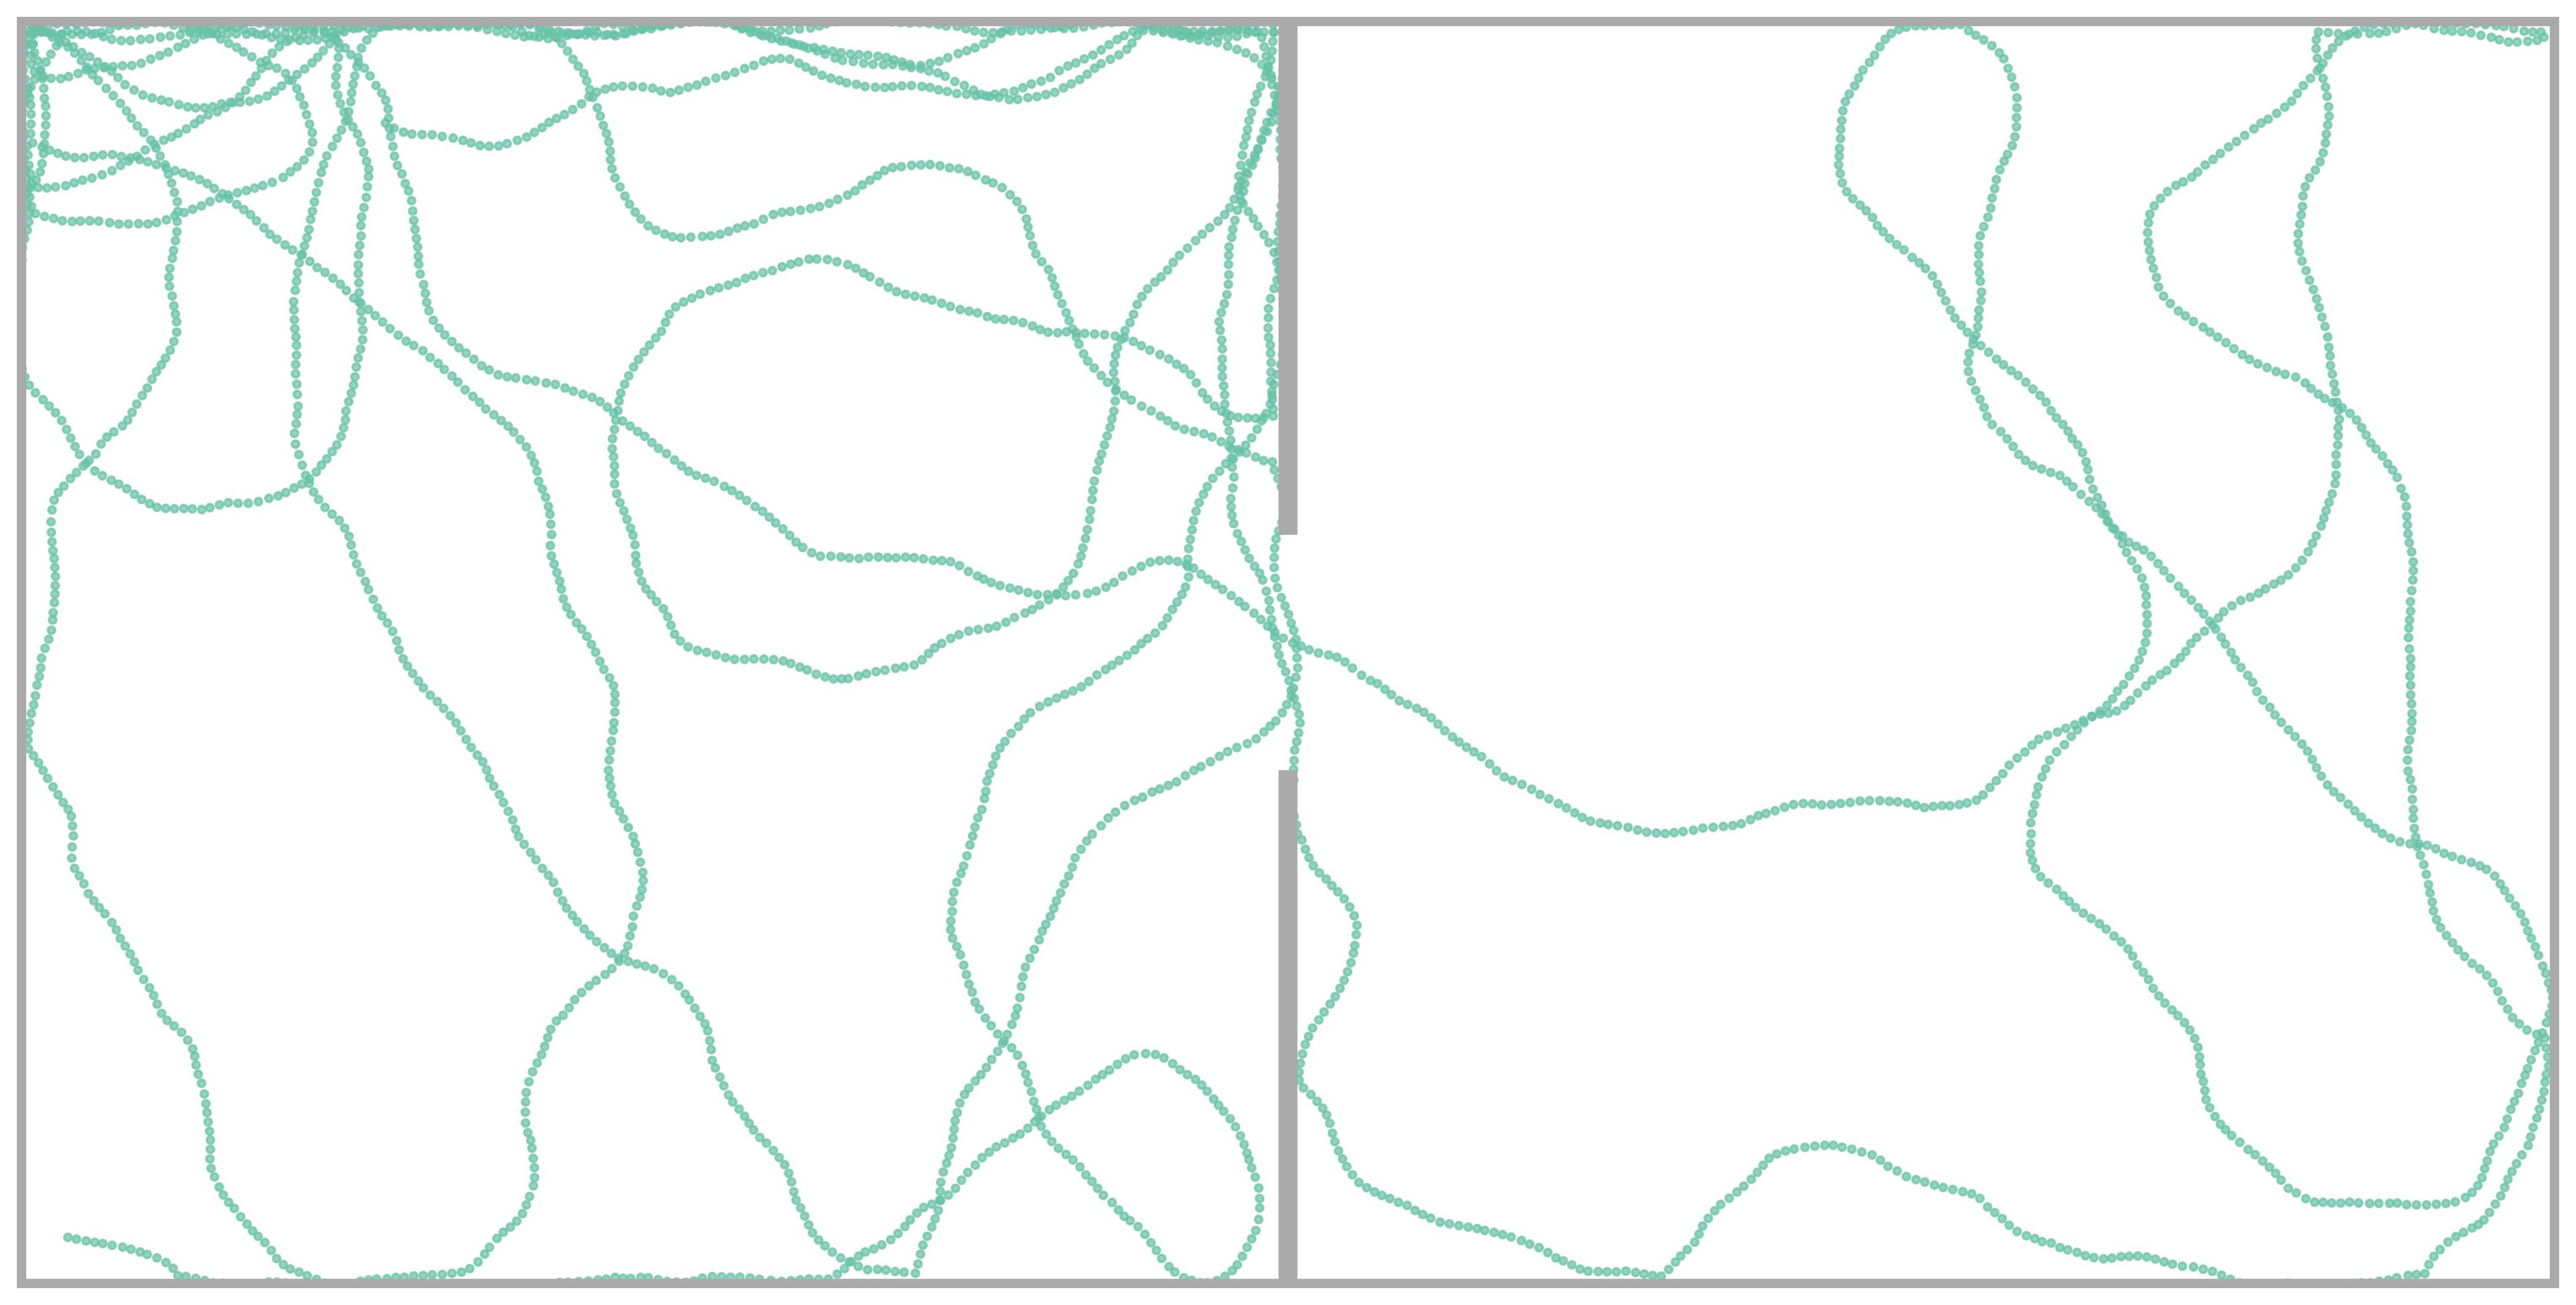

In [31]:
agent3.runRat(trainTime=60, saveEvery=0.1)
plotter3 = Visualiser(agent3)
plotter3.plotTrajectory(endtime=agent3.t/60)

'../figures/210824/M_1239_2'

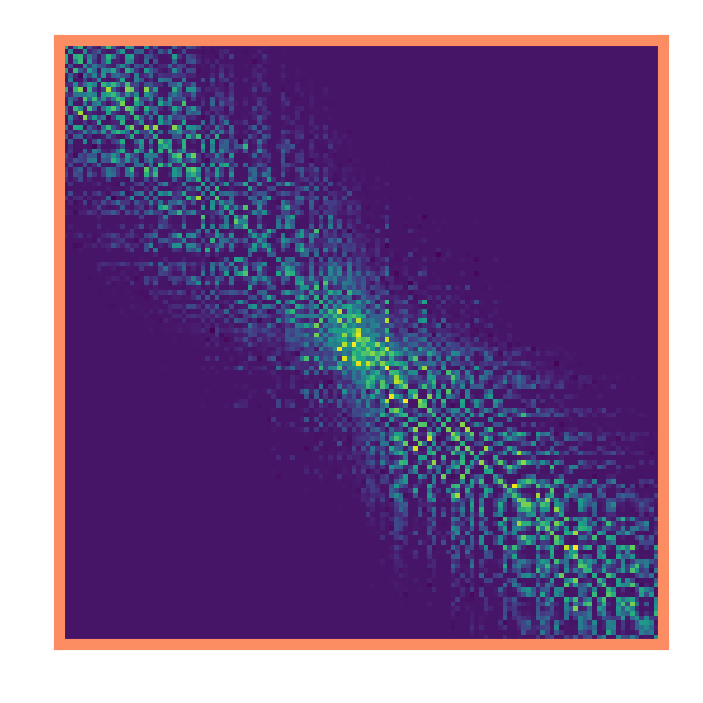

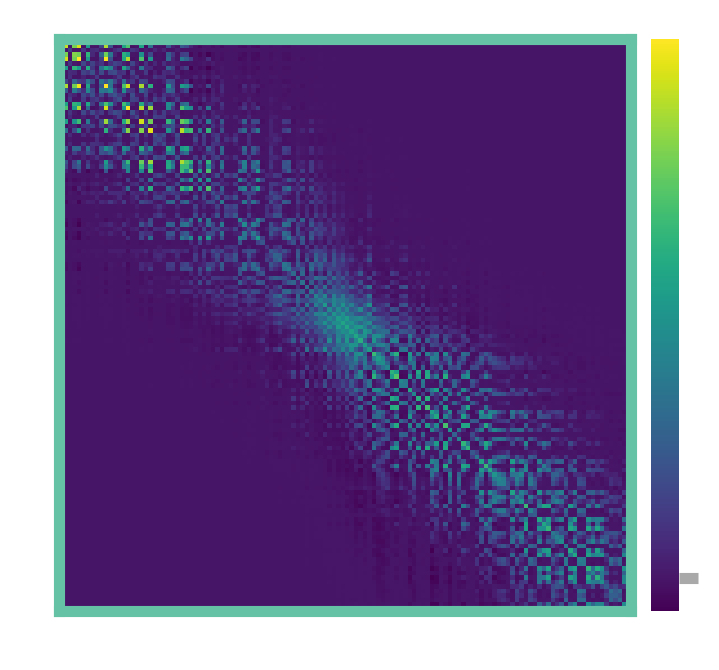

In [47]:
#FIGURE 2L
fig, ax = plotter3.plotM(STDP=True,colorbar=False)
ax.axis('on')
for spine in ax.spines.values():
    spine.set_color('C1')
    spine.set_linewidth(2)
ax.set_xticks([])
ax.set_yticks([])
saveFigure(fig,'W',specialLocation='../figures/paperFigures/figure2/2L.svg')

#FIGURE 2M
fig, ax, cb, cax = plotter3.plotM()
ax.axis('on')
for spine in ax.spines.values():
    spine.set_color('C0')
    spine.set_linewidth(2)
cb.set_ticks([0])
cb.set_ticklabels([""])
cax.tick_params(color='darkgrey',width=2)
ax.set_xticks([])
ax.set_yticks([])
saveFigure(fig,'M',specialLocation='../figures/paperFigures/figure2/2M.svg')


In [14]:
import time 

overwrite = True

if overwrite == True:
    for i in range(10):
        print("WARNING! Overwriting in %g s" %(10-i)) 
        time.sleep(1) 
    pickleAndSave(agent,"openLoop")
    pickleAndSave(agent2,"closedLoop")
    pickleAndSave(agent3,"twoRooms")

WARNING! Overwriting in 10 s
WARNING! Overwriting in 9 s
WARNING! Overwriting in 8 s
WARNING! Overwriting in 7 s
WARNING! Overwriting in 6 s
WARNING! Overwriting in 5 s
WARNING! Overwriting in 4 s
WARNING! Overwriting in 3 s
WARNING! Overwriting in 2 s
WARNING! Overwriting in 1 s


In [15]:
if overwrite == True:
    agent = loadAndDepickle("openLoop")
    agent2 = loadAndDepickle("closedLoop")
    agent3 = loadAndDepickle("twoRooms")

'../figures/210824/openLoopEnd_1448'

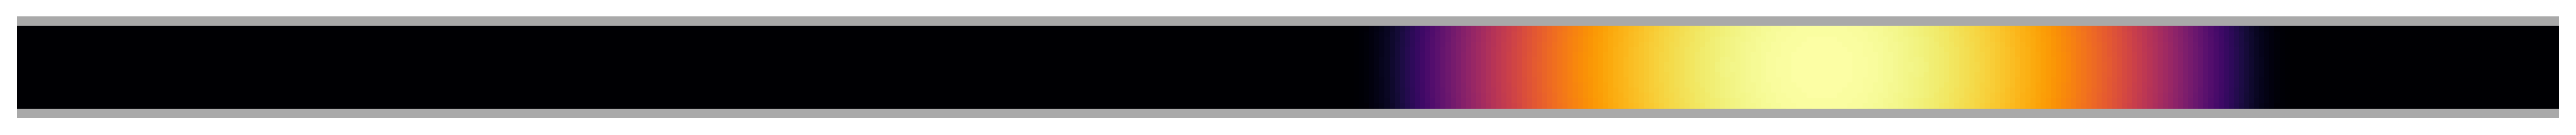

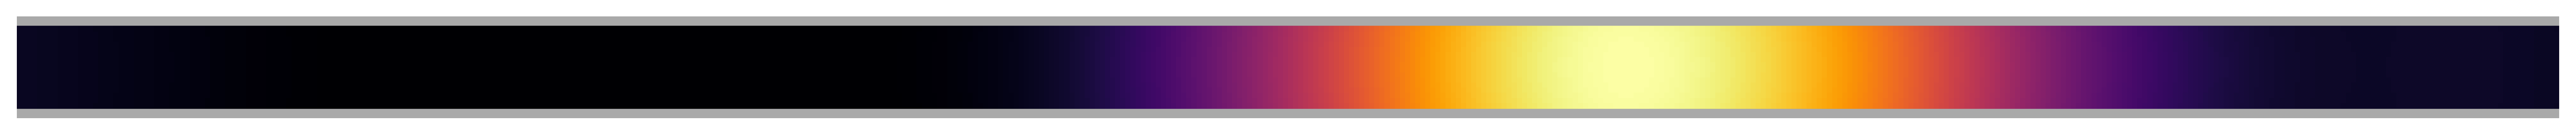

In [57]:
#FIGURE 3A
plotter = Visualiser(agent)
fig, ax = plotter.plotReceptiveField(number=35)
saveFigure(fig,'openLoopStart',specialLocation="../figures/paperFigures/figure3/3Ai.svg")
fig, ax = plotter.plotPlaceField(time=30, number=35, STDP=True,threshold=0.999)
saveFigure(fig,'openLoopEnd',specialLocation="../figures/paperFigures/figure3/3Aii.svg")


'../figures/210824/closedLoopEnd_0847'

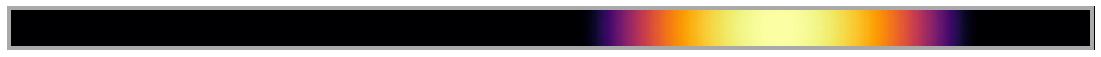

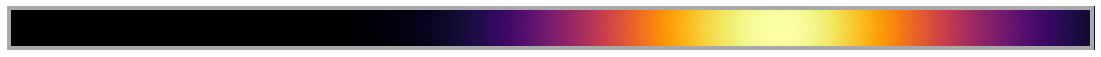

In [18]:
#FIGURE 3B
plotter2 = Visualiser(agent2)
fig, ax = plotter2.plotReceptiveField(number=35)
saveFigure(fig,'closedLoopStart',specialLocation="../figures/paperFigures/figure3/3Bi.svg")
fig, ax = plotter2.plotPlaceField(time=30, number=35, STDP=True)
saveFigure(fig,'closedLoopEnd',specialLocation="../figures/paperFigures/figure3/3Bii.svg")

'../figures/210824/2DMazeSideEnd_0848'

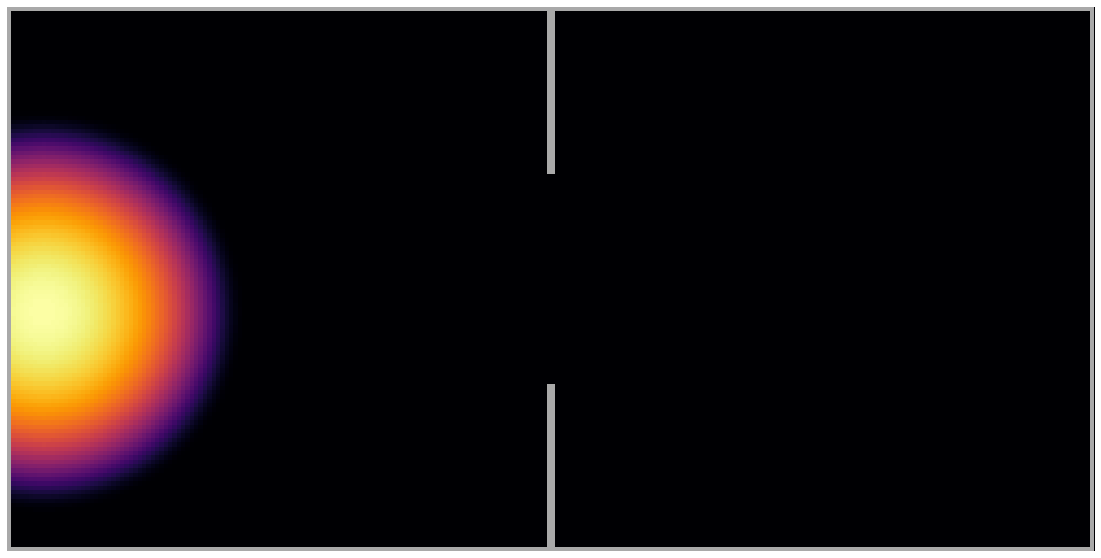

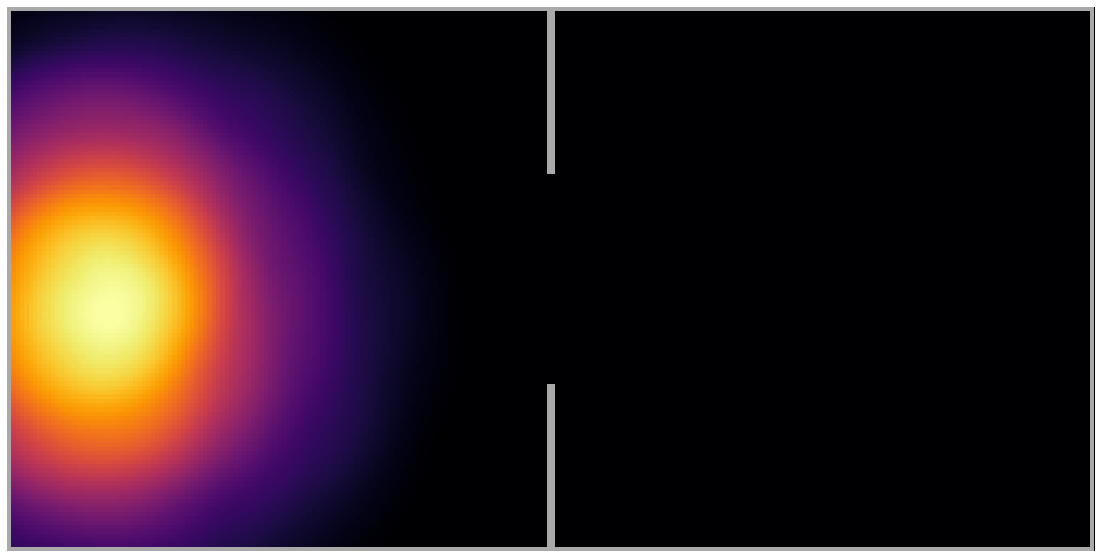

In [19]:
#FIGURE 3C
plotter3 = Visualiser(agent3)
#find cell near wall
cellID = np.argmin(np.linalg.norm(agent3.centres - np.array([0.2,1.25]),axis=1))
fig, ax = plotter3.plotReceptiveField(number=cellID)
saveFigure(fig,'2DMazeSideStart',specialLocation="../figures/paperFigures/figure3/3Ci.svg")
fig, ax = plotter3.plotPlaceField(time=30, number=cellID, STDP=True)
saveFigure(fig,'2DMazeSideEnd',specialLocation="../figures/paperFigures/figure3/3Cii.svg")

'../figures/210824/2DMazeDoorCreepEnd_0917'

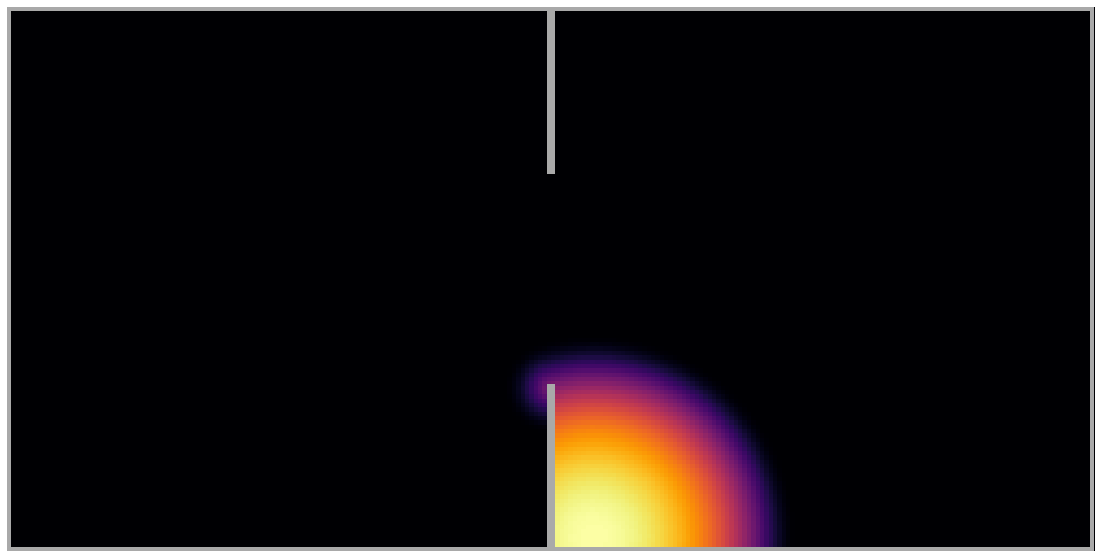

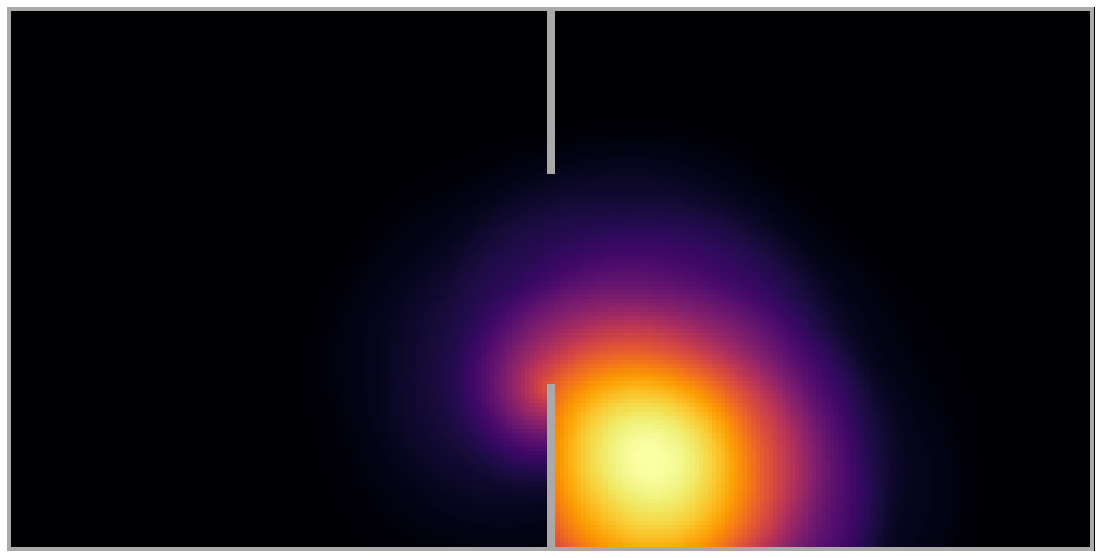

In [27]:
#FIGURE 3D
plotter3 = Visualiser(agent3)
#find cell just behind wall
cellID = np.argmin(np.linalg.norm(agent3.centres - np.array([2.6,0.2]),axis=1))
fig, ax = plotter3.plotReceptiveField(number=cellID)
saveFigure(fig,'2DMazeDoorCreepStart',specialLocation="../figures/paperFigures/figure3/3Di.svg")
fig, ax = plotter3.plotPlaceField(time=30, number=cellID, STDP=True)
saveFigure(fig,'2DMazeDoorCreepEnd',specialLocation="../figures/paperFigures/figure3/3Dii.svg")

In [21]:
N=50
xcen = np.linspace(0,5,N+1)[:-1]
xcen += (xcen[1] - xcen[0]) / 2
ycen = np.array([0.1]*N)
centres = np.vstack((xcen,ycen)).T
centres = np.vstack((centres,centres,centres))
sigmas = np.array([0.5]*N  + [1]*N + [1.5]*N)

#Default parameters for MazeAgent 
params4 = { 

          #Maze params 
          'mazeType'            : 'loop',  #type of maze, define in getMaze() function
          'stateType'           : 'bump', #feature on which to TD learn (onehot, gaussian, gaussianCS, circles, bump)
          'movementPolicy'      : 'windowsScreensaver',  #movement policy (raudies, random walk, windows screensaver)
          'roomSize'            : 5,          #maze size scaling parameter, metres
          'dt'                  : 0.005,       #simulation time disretisation 
          'centres'             : centres,       #array of receptive field positions. Overwrites nCells
          'sigma'               : sigmas,          #basis cell width scale (irrelevant for onehots)
          'doorsClosed'         : False,       #whether doors are opened or closed in multicompartment maze
          'reorderCells'        : False,

          #TD params 
          'tau'                 : 3,          #TD decay time, seconds
          'TDdx'                : 0.01,       #rough distance between TD learning updates, metres 
          'alpha'               : 0.01,       #TD learning rate 
          'successorFeatureNorm': 100,        #linear scaling on successor feature definition found to improve learning stability

          #STDP params
          'a_pre'               : 1,          #bump in cell 'presynaptic trace' when it spikes
          'a_post'              : 0.7,      #bump in cell 'postsynaptic trace' when it spikes
          'precessFraction'     : 1,        #fraction of 2pi the prefered phase moves through
          'peakFiringRate'      : 20,         #peak firing rate of a cell (middle of place field, preferred theta phase)
          'eta_pre'             : 0.05,        #learning rate for pre to post strengthening 
          'eta_post'            : 0.05,        #learning rate for post to pre weakening
          'kappa'               : 1,        #von mises spread parameter (smaller = wider)
          'tau_pre'             : 20e-3,      #rate potentiating trace decays
          'tau_post'            : 20e-3,      #rate depressing trace decays 
          'baselineFiringRate'  : 0

}


agent4 =  MazeAgent(params4)



Setting parameters
Initialising
   making state/history dataframes
   initialising velocity, position and direction
   setting time/run counters
   making the maze walls
   discretising position for later plotting
   handling undefined parameters
   initialising basis features for learning
   calculating state vector at all discretised positions


  0%|          | 0/10000 [00:00<?, ?it/s]

   initialising STDP weight matrix and traces


'../figures/210824/openloop_threetypes_1412'

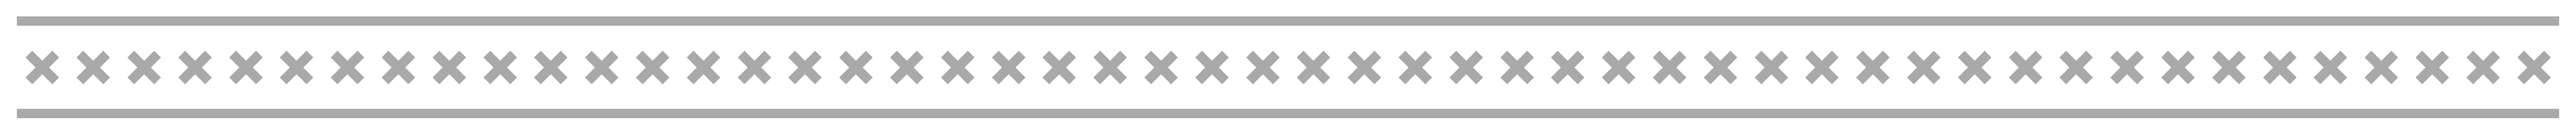

In [54]:
#FIGURE 4A 
plotter4 = Visualiser(agent4)
fig, ax = plotter4.plotFeatureCells(centresOnly=True, textlabel=False,threetypes=False)
saveFigure(fig,'openloop_threetypes',specialLocation="../figures/paperFigures/figure4/4C.svg")

  0%|          | 0/360000 [00:00<?, ?it/s]

../mazeAgentUtils.py:819: RuntimeWarning: overflow encountered in exp
  state[distance<self.sigmas] += np.e * np.exp(-1/(1-(distance/self.sigmas)**2))[distance<self.sigmas]


Calculating place and grid cells


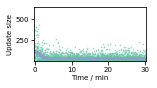

In [23]:
agent4.runRat(trainTime=30,saveEvery=0.1)
plotter4 = Visualiser(agent4)

'../figures/210824/M_1417_2'

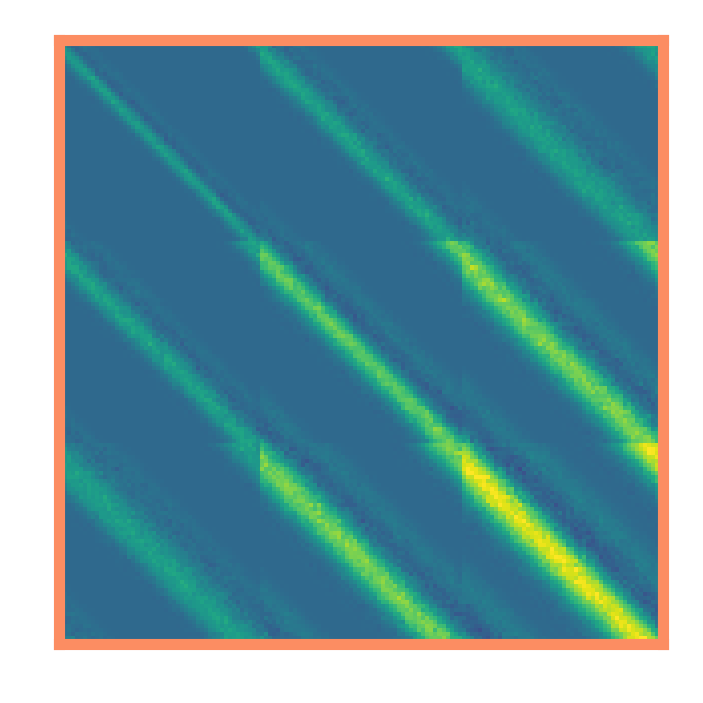

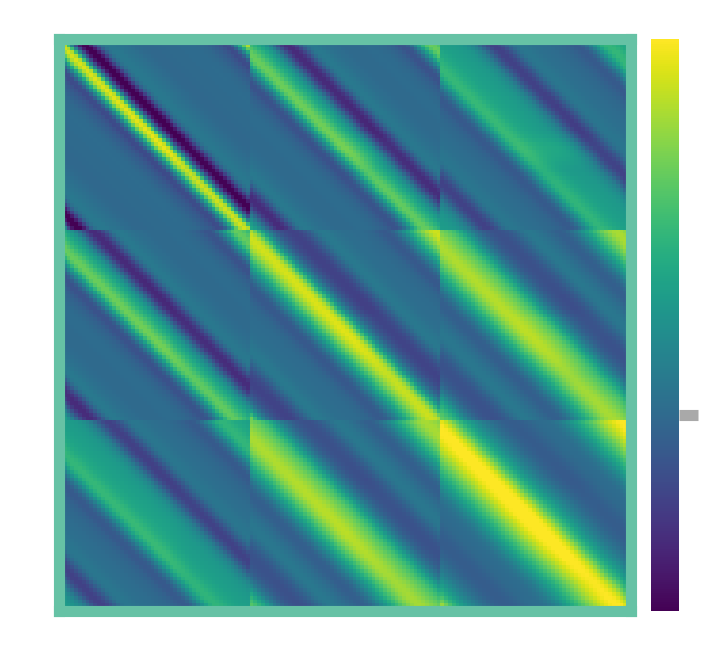

In [55]:
#FIGURE 2L
fig, ax = plotter4.plotM(STDP=True,colorbar=False)
ax.axis('on')
for spine in ax.spines.values():
    spine.set_color('C1')
    spine.set_linewidth(2)
ax.set_xticks([])
ax.set_yticks([])
saveFigure(fig,'W',specialLocation='../figures/paperFigures/figure4/4D.svg')

#FIGURE 2M
fig, ax, cb, cax = plotter4.plotM()
ax.axis('on')
for spine in ax.spines.values():
    spine.set_color('C0')
    spine.set_linewidth(2)
cb.set_ticks([0])
cb.set_ticklabels([""])
cax.tick_params(color='darkgrey',width=2)
ax.set_xticks([])
ax.set_yticks([])
saveFigure(fig,'M',specialLocation='../figures/paperFigures/figure4/4E.svg')

In [25]:
#FIGURE 4A
N=50
loopsize=5
xcen = np.linspace(0,loopsize,N+1)[:-1]
xcen += (xcen[1] - xcen[0]) / 2
ycen = np.array([0.1]*N)
centres = np.vstack((xcen,ycen)).T

sigmas = [0.25,0.5,0.75,1,1.25,1.5,1.75,2]
w_bank = np.zeros(shape=(len(sigmas),N,N))

for (i, sigma) in enumerate(sigmas):
    parameters = {
            #Maze params 
            'mazeType'            : 'loop',  #type of maze, define in getMaze() function
            'stateType'           : 'bump', #feature on which to TD learn (onehot, gaussian, gaussianCS, circles, bump)
            'movementPolicy'      : 'windowsScreensaver',  #movement policy (raudies, random walk, windows screensaver)
            'roomSize'            : loopsize,          #maze size scaling parameter, metres
            'dt'                  : 0.005,       #simulation time disretisation 
            'centres'             : centres,       #array of receptive field positions. Overwrites nCells
            'sigma'               : sigma,          #basis cell width scale (irrelevant for onehots)
            'doorsClosed'         : False,       #whether doors are opened or closed in multicompartment maze
            #TD params 
            'tau'                 : 3,          #TD decay time, seconds
            'TDdx'                : 0.01,       #rough distance between TD learning updates, metres 
            'alpha'               : 0.01,       #TD learning rate 
            'successorFeatureNorm': 100,        #linear scaling on successor feature definition found to improve learning stability
            #STDP params
            'a_pre'               : 1,          #bump in cell 'presynaptic trace' when it spikes
            'a_post'              : 0.7,      #bump in cell 'postsynaptic trace' when it spikes
            'precessFraction'     : 1,        #fraction of 2pi the prefered phase moves through
            'peakFiringRate'      : 20,         #peak firing rate of a cell (middle of place field, preferred theta phase)
            'eta_pre'             : 0.05,        #learning rate for pre to post strengthening 
            'eta_post'            : 0.05,        #learning rate for post to pre weakening
            'kappa'               : 1,        #von mises spread parameter (smaller = wider)
            'tau_pre'             : 20e-3,      #rate potentiating trace decays
            'tau_post'            : 20e-3,      #rate depressing trace decays 
            'baselineFiringRate'  : 0
    }

    agentsigma =  MazeAgent(parameters)
    agentsigma.runRat(trainTime=10,TDSRLearn=False)
    w_bank[i] = agentsigma.W


Setting parameters
Initialising
   making state/history dataframes
   initialising velocity, position and direction
   setting time/run counters
   making the maze walls
   discretising position for later plotting
   handling undefined parameters
   initialising basis features for learning
   calculating state vector at all discretised positions


  0%|          | 0/10000 [00:00<?, ?it/s]

   initialising STDP weight matrix and traces


  0%|          | 0/120000 [00:00<?, ?it/s]

../mazeAgentUtils.py:819: RuntimeWarning: overflow encountered in exp
  state[distance<self.sigmas] += np.e * np.exp(-1/(1-(distance/self.sigmas)**2))[distance<self.sigmas]


Calculating place and grid cells
Setting parameters
Initialising
   making state/history dataframes
   initialising velocity, position and direction
   setting time/run counters
   making the maze walls
   discretising position for later plotting
   handling undefined parameters
   initialising basis features for learning
   calculating state vector at all discretised positions


  0%|          | 0/10000 [00:00<?, ?it/s]

   initialising STDP weight matrix and traces


  0%|          | 0/120000 [00:00<?, ?it/s]

Calculating place and grid cells
Setting parameters
Initialising
   making state/history dataframes
   initialising velocity, position and direction
   setting time/run counters
   making the maze walls
   discretising position for later plotting
   handling undefined parameters
   initialising basis features for learning
   calculating state vector at all discretised positions


  0%|          | 0/10000 [00:00<?, ?it/s]

   initialising STDP weight matrix and traces


  0%|          | 0/120000 [00:00<?, ?it/s]

Calculating place and grid cells
Setting parameters
Initialising
   making state/history dataframes
   initialising velocity, position and direction
   setting time/run counters
   making the maze walls
   discretising position for later plotting
   handling undefined parameters
   initialising basis features for learning
   calculating state vector at all discretised positions


  0%|          | 0/10000 [00:00<?, ?it/s]

   initialising STDP weight matrix and traces


  0%|          | 0/120000 [00:00<?, ?it/s]

Calculating place and grid cells
Setting parameters
Initialising
   making state/history dataframes
   initialising velocity, position and direction
   setting time/run counters
   making the maze walls
   discretising position for later plotting
   handling undefined parameters
   initialising basis features for learning
   calculating state vector at all discretised positions


  0%|          | 0/10000 [00:00<?, ?it/s]

   initialising STDP weight matrix and traces


  0%|          | 0/120000 [00:00<?, ?it/s]

Calculating place and grid cells
Setting parameters
Initialising
   making state/history dataframes
   initialising velocity, position and direction
   setting time/run counters
   making the maze walls
   discretising position for later plotting
   handling undefined parameters
   initialising basis features for learning
   calculating state vector at all discretised positions


  0%|          | 0/10000 [00:00<?, ?it/s]

   initialising STDP weight matrix and traces


  0%|          | 0/120000 [00:00<?, ?it/s]

Calculating place and grid cells
Setting parameters
Initialising
   making state/history dataframes
   initialising velocity, position and direction
   setting time/run counters
   making the maze walls
   discretising position for later plotting
   handling undefined parameters
   initialising basis features for learning
   calculating state vector at all discretised positions


  0%|          | 0/10000 [00:00<?, ?it/s]

   initialising STDP weight matrix and traces


  0%|          | 0/120000 [00:00<?, ?it/s]

Calculating place and grid cells
Setting parameters
Initialising
   making state/history dataframes
   initialising velocity, position and direction
   setting time/run counters
   making the maze walls
   discretising position for later plotting
   handling undefined parameters
   initialising basis features for learning
   calculating state vector at all discretised positions


  0%|          | 0/10000 [00:00<?, ?it/s]

   initialising STDP weight matrix and traces


  0%|          | 0/120000 [00:00<?, ?it/s]

Calculating place and grid cells


'../figures/210824/tausigma_1351_1'

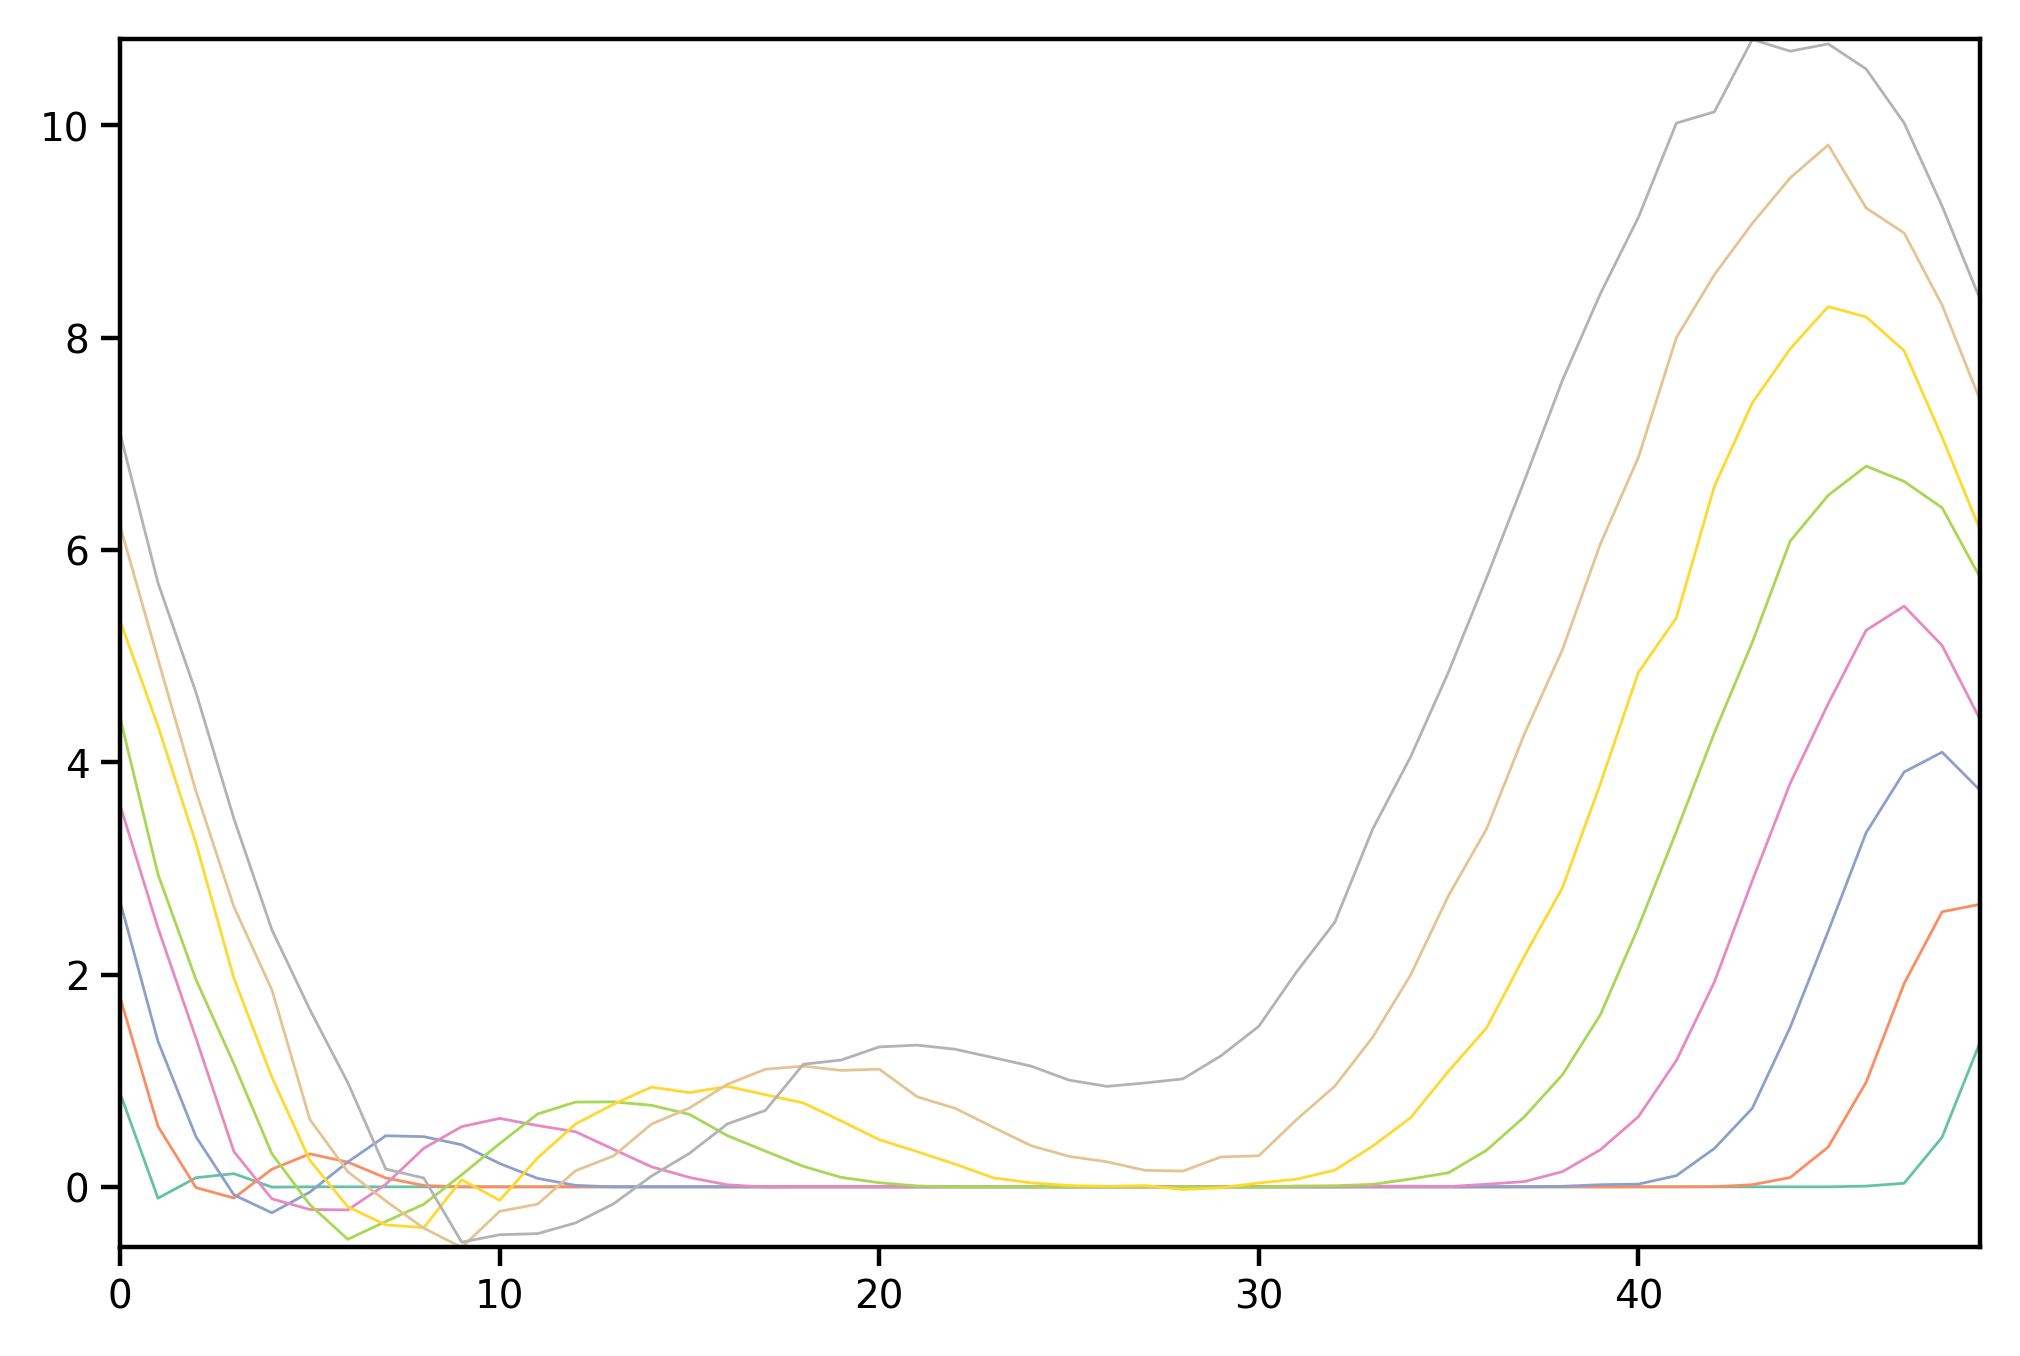

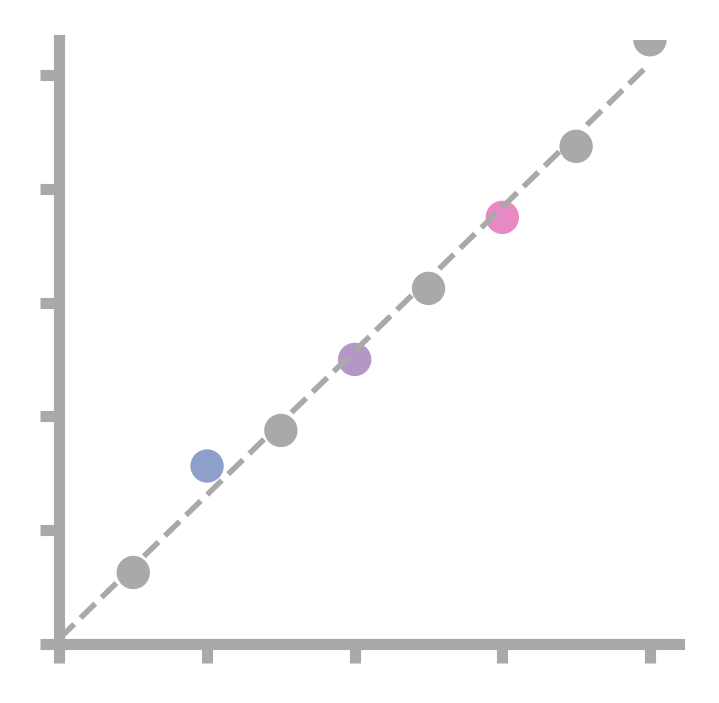

In [52]:
taus = np.zeros(len(sigmas))
taus_sigma = np.zeros(len(sigmas))

for (i,sigma) in enumerate(sigmas):
    t = []
    w_shifted = np.zeros_like(agentsigma.W)
    w = w_bank[i]
    for j in range(agentsigma.nCells):
        w_shifted[j,:] = np.roll(w[j,:],-j)
    w_shifted_mean = np.mean(w_shifted,axis=0)
    b = np.argmax(w_shifted_mean)
    plt.plot(w_shifted_mean)
    max_binding = w_shifted_mean[b]
    while True: 
        if w_shifted_mean[b] <= max_binding / np.e:
            t = agentsigma.nCells - b
            break
        else: 
            b -= 1 
    tau =  t * (agentsigma.roomSize / agentsigma.nCells) / (agentsigma.speedScale)
    taus[i] = tau

taus_plot = taus
taus_sigma_plot = taus_sigma
sigmas_plot = sigmas



fig, ax = plt.subplots(figsize=(2,2))
[m,c] = np.polyfit(sigmas_plot,taus_plot,deg=1)
x = np.linspace(0,sigmas_plot[-1],100)
y = m*x + c
color = ['darkgrey'] * len(sigmas)
color[1],color[3],color[5] = 'C2','#B696C7','C3'
size = [25] * len(sigmas)
ax.scatter(sigmas_plot,taus_plot,s=size,c=color)
# ax.errorbar(sigmas_plot,taus_plot,taus_sigma_plot,ls="none",c=color)
ax.plot(x,y,c='darkgrey',linestyle='--',linewidth=1)
ax.set_ylim(bottom=0)
ax.set_xlim(left=0,right=sigmas_plot[-1]+0.1)
ax.spines['left'].set_position('zero')
ax.spines['left'].set_color('darkgrey')
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_color('none')        
ax.spines['bottom'].set_position('zero')
ax.spines['bottom'].set_color('darkgrey')
ax.spines['bottom'].set_linewidth(2)
ax.spines['top'].set_color('none')
ax.set_xticks([0,0.5,1,1.5,2])
ax.set_xticklabels(['','','','',''])
ax.set_yticks([0,2,4,6,8,10])
ax.set_yticklabels(['','','','',''])
ax.tick_params(width=2,color='darkgrey')

saveFigure(fig,"tausigma",specialLocation="../figures/paperFigures/figure4/4A.svg")


Setting parameters
Initialising
   making state/history dataframes
   initialising velocity, position and direction
   setting time/run counters
   making the maze walls
   discretising position for later plotting
      dx must be an integer fraction of room size, setting it to 0.2083, 12 along room length
   handling undefined parameters
   initialising basis features for learning
   calculating state vector at all discretised positions


  0%|          | 0/288 [00:00<?, ?it/s]

   initialising STDP weight matrix and traces


  0%|          | 0/2000 [00:00<?, ?it/s]

flipping coin
heads
Calculating place and grid cells


(<Figure size 8000x4000 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fee27d75240>)

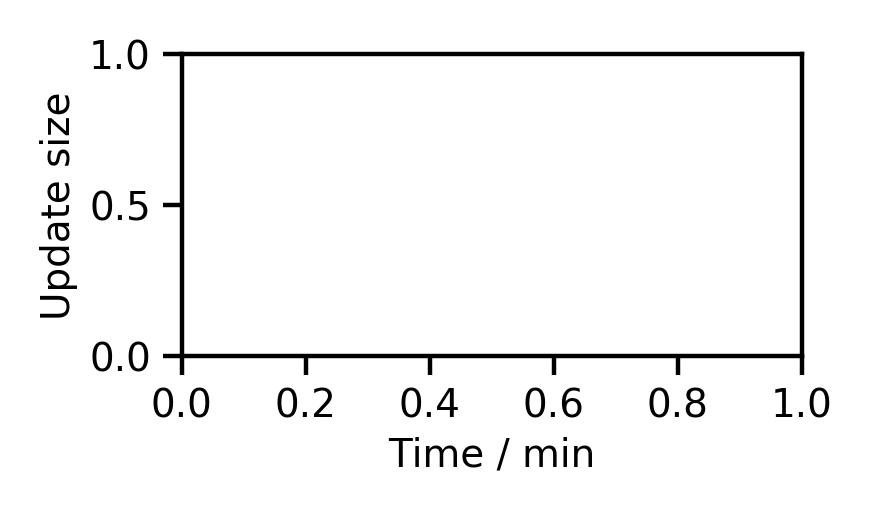

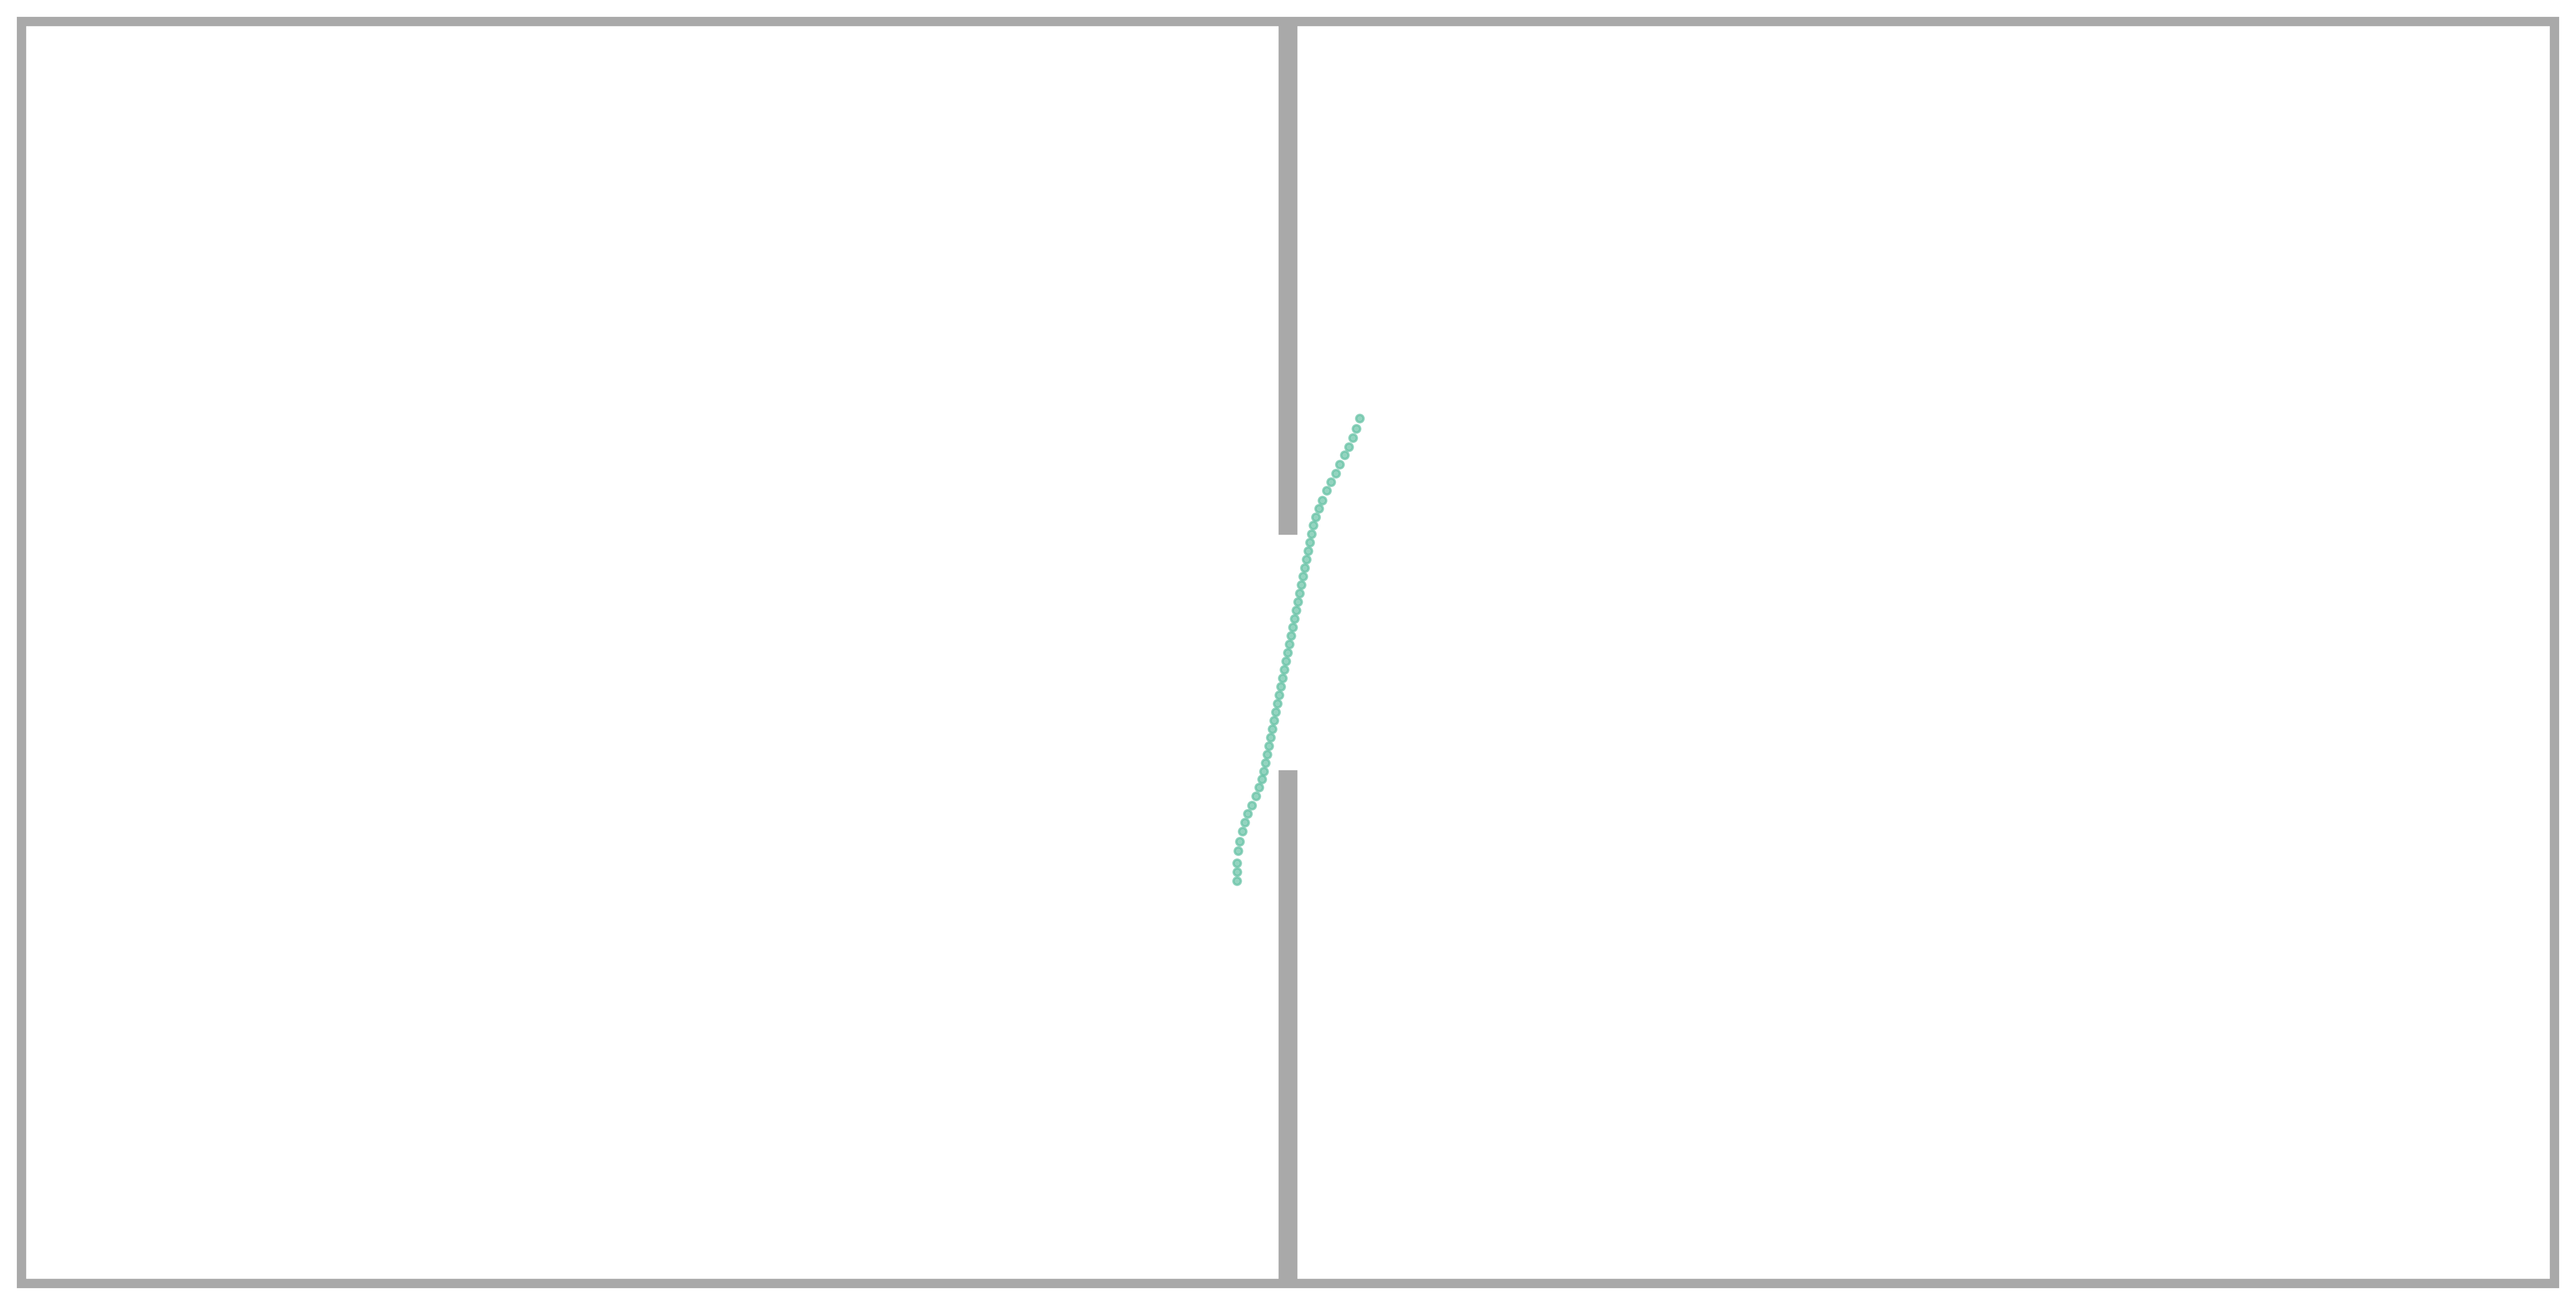

In [27]:
centres = np.array([[2.51,0.01]])

params5 = { 

          #Maze params 
          'mazeType'            : 'twoRooms',  #type of maze, define in getMaze() function
          'stateType'           : 'gaussianThreshold', #feature on which to TD learn (onehot, gaussian, gaussianCS, circles, bump)
          'movementPolicy'      : 'raudies',  #movement policy (raudies, random walk, windows screensaver)
          'roomSize'            : 2.5,          #maze size scaling parameter, metres
          'dt'                  : 0.0025,       #simulation time disretisation 
          'dx'                  : 0.2,
          'centres'             : centres,
          'sigma'               : 1,          #basis cell width scale (irrelevant for onehots)
          'doorsClosed'         : False,       #whether doors are opened or closed in multicompartment maze
          'rotSpeedScale'       : 6,
          'firingRateLookUp'    : True,
          'initPos'             : [2.4,0.8],
          'initDir'             : [0,1],
          'biasDoorCross'       : True,

          #TD params 
          'tau'                 : 3,          #TD decay time, seconds
          'TDdx'                : 0.01,       #rough distance between TD learning updates, metres 
          'alpha'               : 0.01,       #TD learning rate 
          'successorFeatureNorm': 100,        #linear scaling on successor feature definition found to improve learning stability

          #STDP params
          'a_pre'               : 1,          #bump in cell 'presynaptic trace' when it spikes
          'a_post'              : 0.7,        #bump in cell 'postsynaptic trace' when it spikes
          'precessFraction'     : 1,        #fraction of 2pi the prefered phase moves through
          'peakFiringRate'      : 20,         #peak firing rate of a cell (middle of place field, preferred theta phase)
          'eta_pre'             : 0.05,        #learning rate for pre to post strengthening 
          'eta_post'            : 0.05,        #learning rate for post to pre weakening
          'kappa'               : 1,        #von mises spread parameter (smaller = wider)
          'tau_pre'             : 20e-3,      #rate potentiating trace decays
          'tau_post'            : 20e-3,      #rate depressing trace decays 
          'weightDecayTime'     : 10000,         #STDP weight decay time in seconds 
}

agent5 =  MazeAgent(params5)
agent5.runRat(trainTime=5/60)
plotter5 = Visualiser(agent5)
plotter5.plotTrajectory(endtime=agent5.t / 60)

In [17]:
agent5.doorPassage

False